### 約定結果を確認するノートブック

In [1]:
import sys
sys.path.append('../')
import os

In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

#自作モジュール
from gmo_api import GmoApi_private

In [22]:
# config.jsonの読み込み
with open("../config.json", 'r') as f:
    config = json.load(f)

apiKey    = config['GMO_API_KEY']
secretKey = config['GMO_API_SECRET']
symbols = config['symbols']

gmo_api_private = GmoApi_private(apiKey, secretKey)

BASE_DIR = '../data/historical_klines/'

In [23]:
def view_ls_signals(symbol):
    df = pd.DataFrame(gmo_api_private.get_latestExecutions(symbol = symbol)['data']['list'])
    # Convert timestamp to datetime object
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Convert price to numeric for plotting
    df['price'] = pd.to_numeric(df['price'])
    
    # Create a new figure and an axes
    fig, ax = plt.subplots(figsize = (10, 6))
    
    # Create line plot of price
    df.plot(x='timestamp', y='price', ax=ax, legend=False)
    
    # Add buy and sell signals to the plot
    buy_signals = df[df['side'] == 'BUY']
    sell_signals = df[df['side'] == 'SELL']
    ax.scatter(buy_signals['timestamp'], buy_signals['price'], color='blue', marker='^', label='Buy')
    ax.scatter(sell_signals['timestamp'], sell_signals['price'], color='red', marker='v', label='Sell')
    
    # Add a legend
    ax.legend()
    
    # Show the plot
    plt.show()


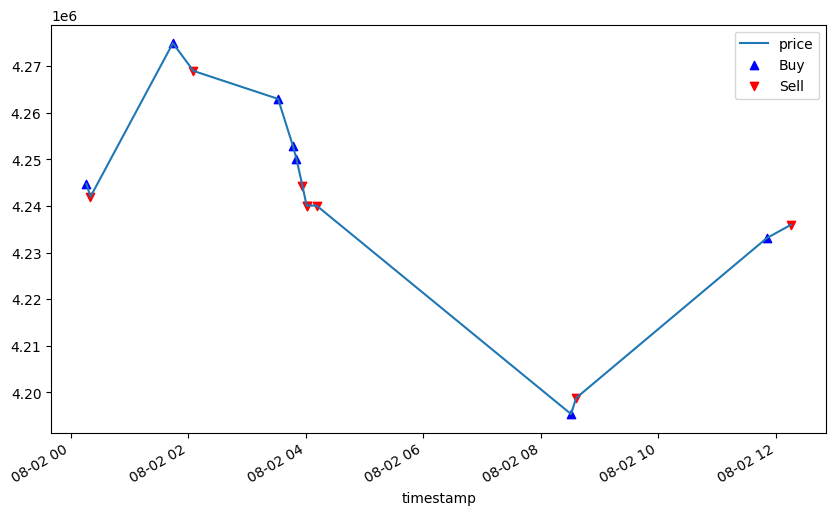

In [33]:
view_ls_signals('BTC')

In [28]:
gmo_api_private.get_latestExecutions(symbol = 'ASTR')

{'status': 0,
 'data': {'list': [{'executionId': 705863788,
    'fee': '0',
    'lossGain': '0',
    'orderId': 3719137878,
    'price': '7.438',
    'settleType': 'OPEN',
    'side': 'SELL',
    'size': '130',
    'symbol': 'ASTR',
    'timestamp': '2023-08-02T20:57:42.142Z'},
   {'executionId': 705863370,
    'fee': '0',
    'lossGain': '0',
    'orderId': 3718720353,
    'price': '7.388',
    'settleType': 'OPEN',
    'side': 'BUY',
    'size': '130',
    'symbol': 'ASTR',
    'timestamp': '2023-08-02T17:08:40.236Z'},
   {'executionId': 705618258,
    'fee': '0',
    'lossGain': '0',
    'orderId': 3717522090,
    'price': '7.665',
    'settleType': 'OPEN',
    'side': 'SELL',
    'size': '130',
    'symbol': 'ASTR',
    'timestamp': '2023-08-02T06:46:25.267Z'},
   {'executionId': 705618114,
    'fee': '0',
    'lossGain': '0',
    'orderId': 3717355220,
    'price': '7.615',
    'settleType': 'OPEN',
    'side': 'BUY',
    'size': '130',
    'symbol': 'ASTR',
    'timestamp': '2023